# Network Analysis using Networkx

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx

## 1. Create a complete graph with 7 nodes and verify that it is complete by looking at the edges. Do this manually and using a built-in method.

In [3]:
nodes = list(range(1, 8))
edges = [(i, j) for i in nodes for j in nodes[i:]]

In [4]:
g = nx.Graph()
g.add_edges_from(edges)

In [5]:
(1, 2) in g.edges

True

In [6]:
def check_completeness(graph):
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 != node2 and (node1, node2) not in graph.edges:
                return 'not complete'
    return 'complete'

In [7]:
h = nx.Graph()
h.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

In [8]:
check_completeness(h)

'not complete'

In [9]:
check_completeness(g)

'complete'

In [10]:
g = nx.complete_graph(7)
g.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)])

In [11]:
check_completeness(g)

'complete'

## 2. Create a function that will draw a given graph that has a layout type parameter and labels the nodes. Now draw the graph created in the last problem using circular layout.

In [12]:
def draw_with_labels(graph, layout_type=None, **kwargs):
    plt.figure(figsize=(16, 10))
    if layout_type == None:
        nx.draw(graph, with_labels=True)
    elif layout_type == 'circular':
        nx.draw_circular(graph, with_labels=True)
    elif layout_type == 'random':
        nx.draw_random(graph, with_labels=True)
    elif layout_type == 'spectral':
        nx.draw_spectral(graph, with_labels=True)
    elif layout_type == 'shell':
        nx.draw_shell(graph, with_labels=True, **kwargs)

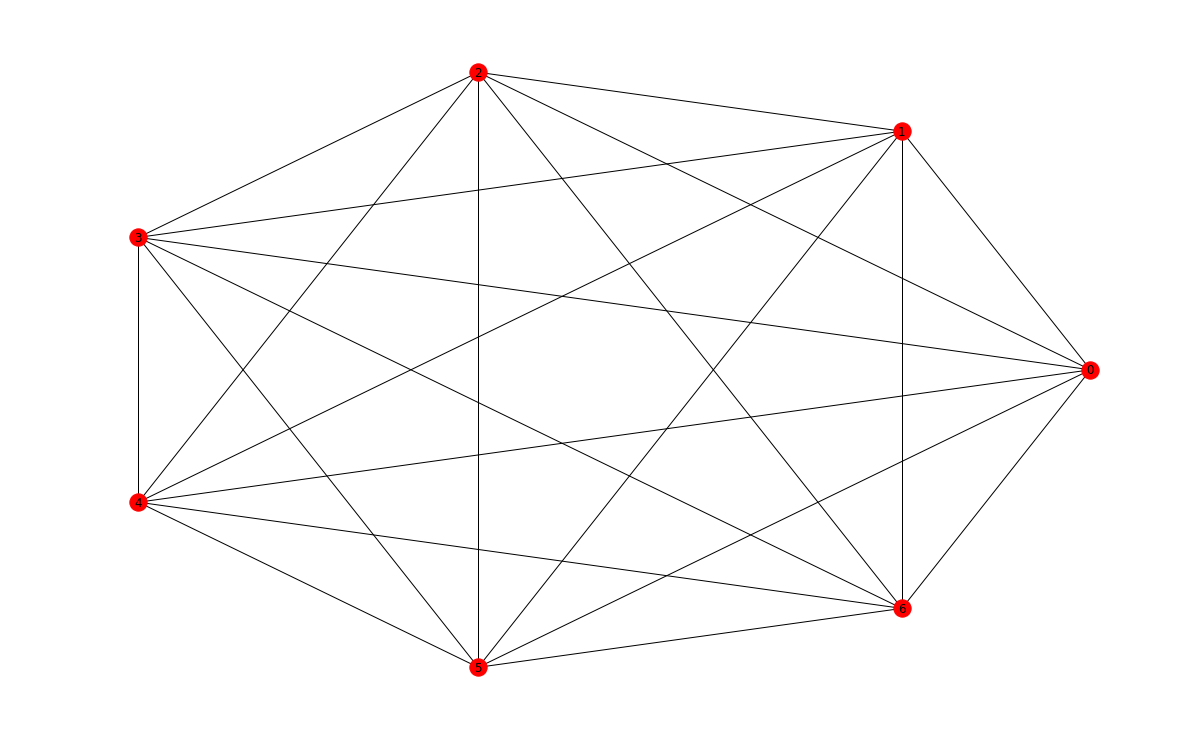

In [13]:
draw_with_labels(g, 'circular')

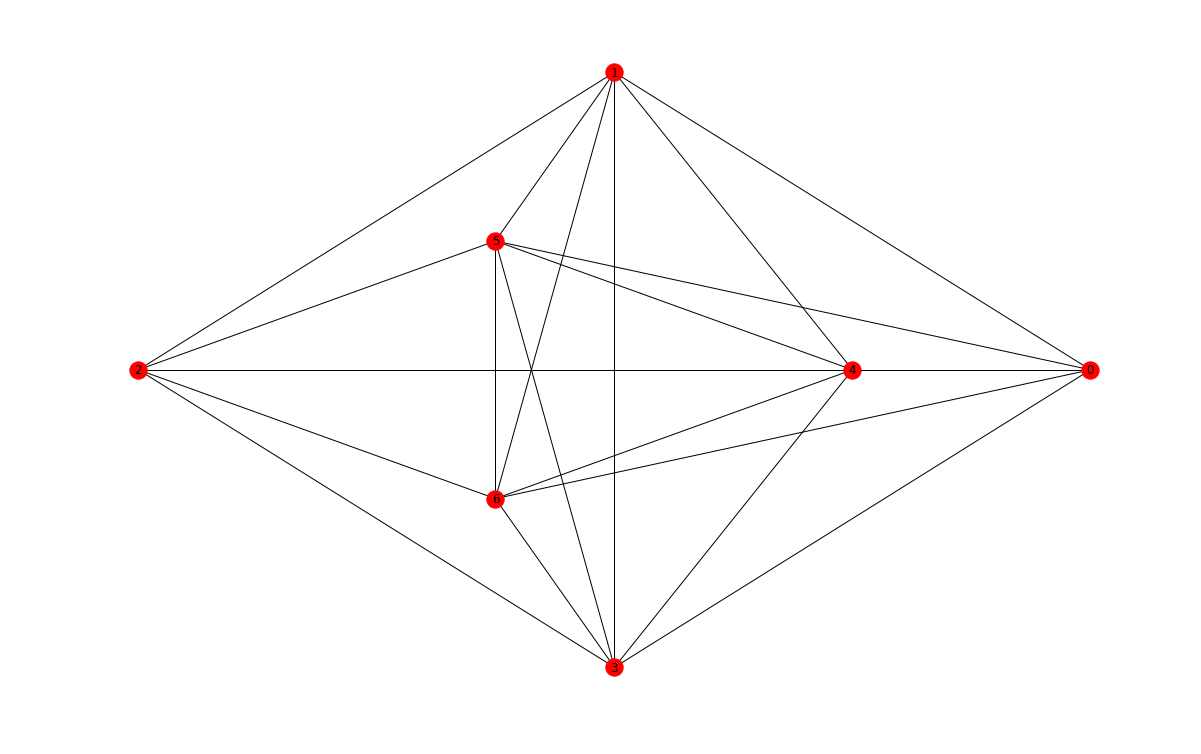

In [14]:
draw_with_labels(g, 'shell', nlist=[range(4, 7), range(4)])

## 3. Create a graph with 10 nodes and 3 components. Draw this graph.

In [15]:
h1 = nx.cycle_graph(4)
h2 = nx.complete_graph(range(4, 7))
h3 = nx.complete_bipartite_graph([7, 8], [9])
h = nx.Graph()
h.add_edges_from(h1.edges)
h.add_edges_from(h2.edges)
h.add_edges_from(h3.edges)

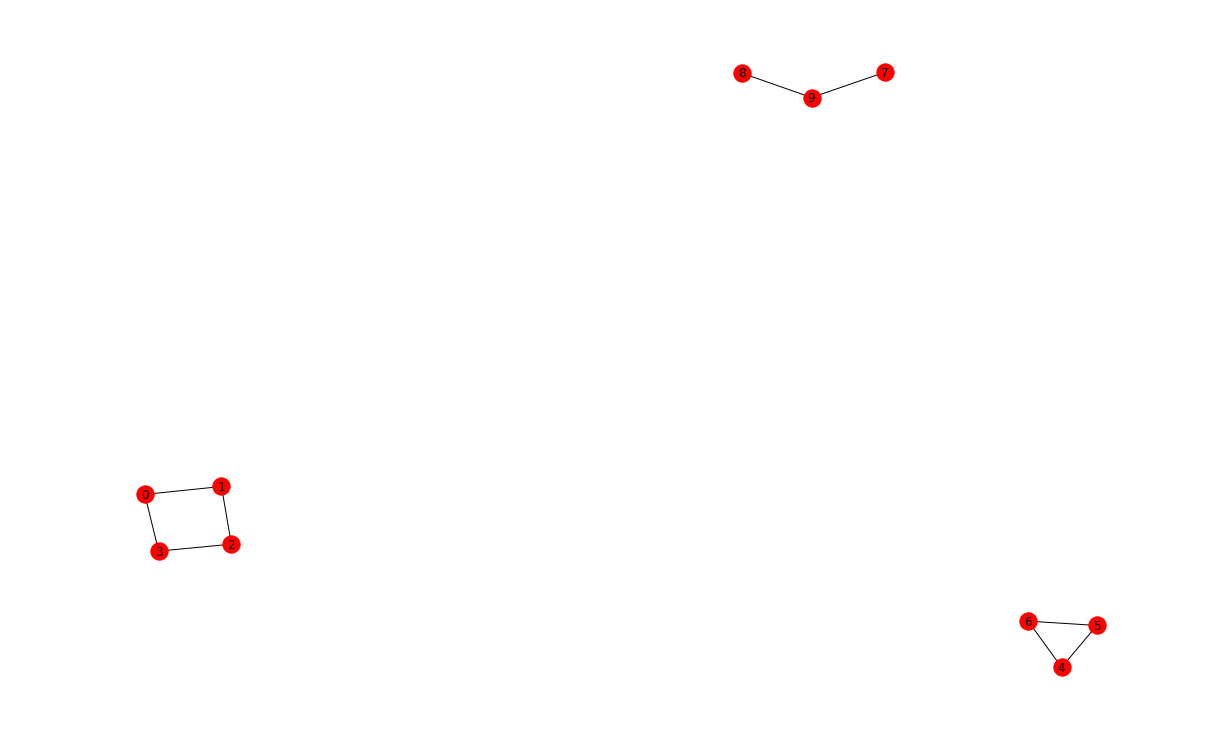

In [16]:
draw_with_labels(h)

## 4. Create a simple connected digraph with 4 nodes and a diameter of 2.

In [17]:
d = nx.DiGraph()
d.add_nodes_from(range(4))
d.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (3, 1), (0, 2), (1, 0)])
nx.diameter(d)

2

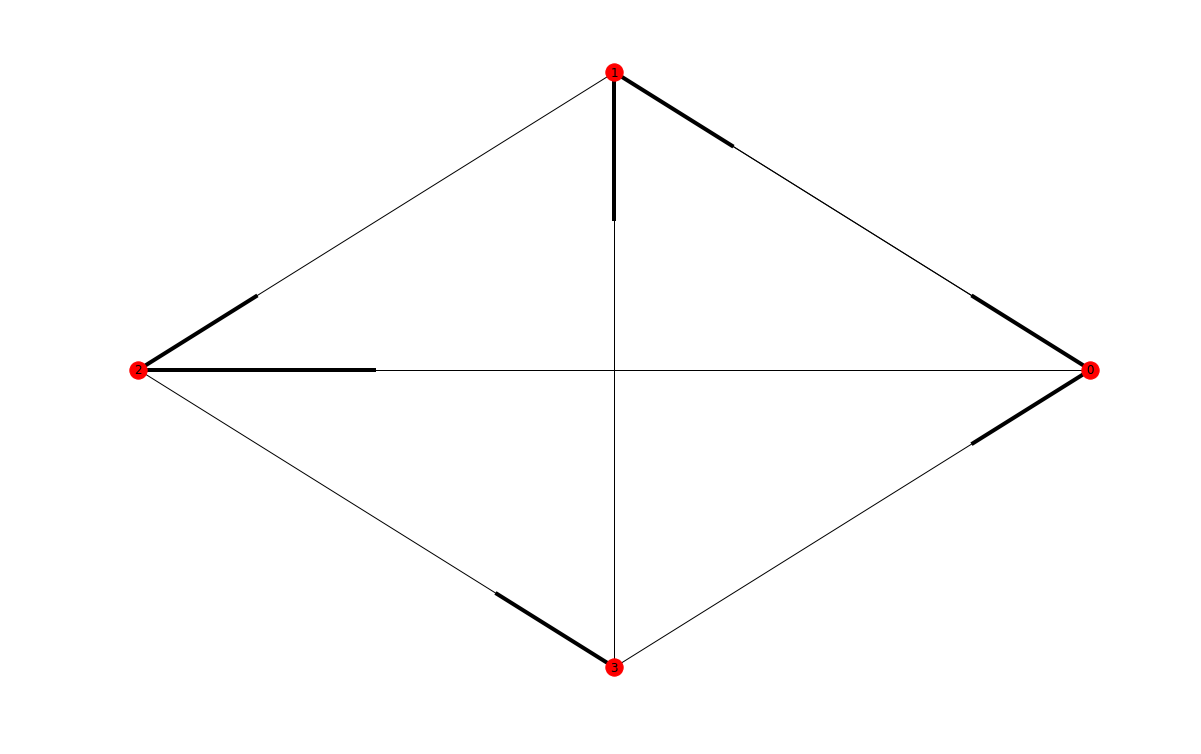

In [18]:
draw_with_labels(d, 'circular')

## 5. Create another 4 node digraph with weighted edges. Draw this graph with node and edge weight labels.

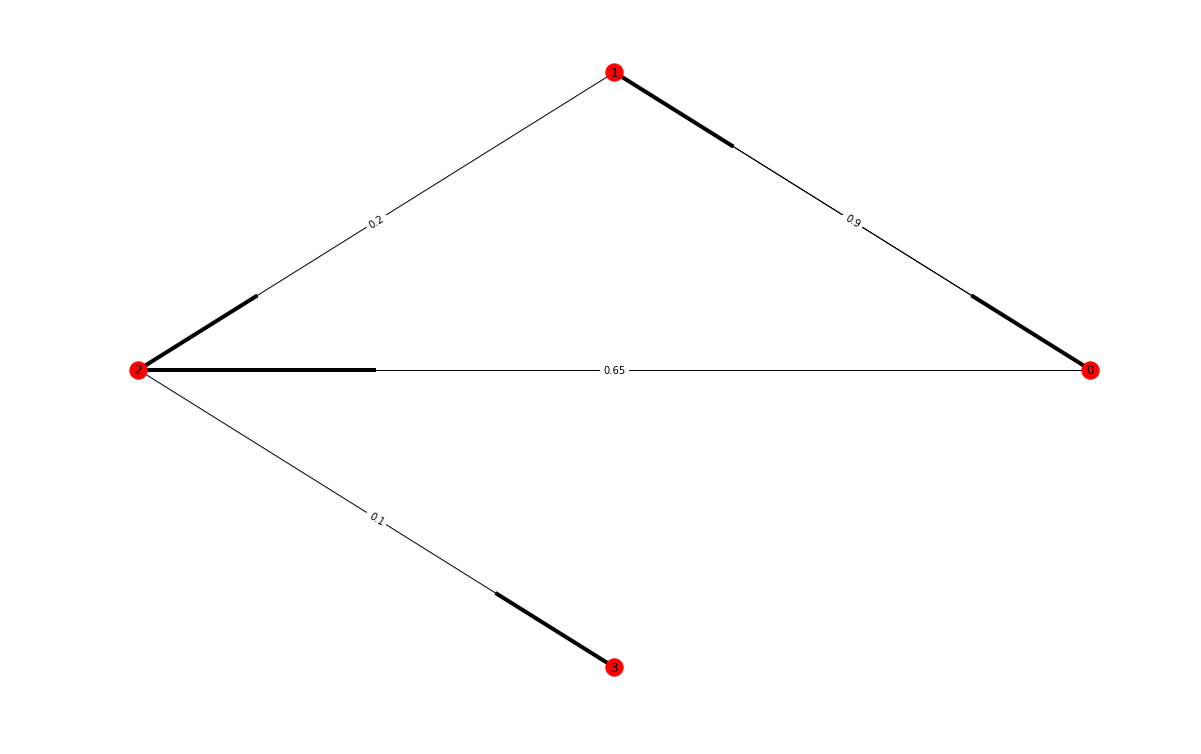

In [19]:
d = nx.DiGraph()
d.add_nodes_from(range(4))
d.add_weighted_edges_from([(0, 1, 0.5), (1, 2, 0.2),
                           (2, 3, 0.1), (0, 2, 0.65), (1, 0, 0.9)])

draw_with_labels(d, 'circular')
nx.draw_networkx_edge_labels(d, pos=nx.circular_layout(d),
                             edge_labels={item[0]:item[1]['weight'] for item in d.edges.items()});

## 6. Create the adjacnency matrix from the edge data in edges_1.pkl

In [20]:
edgelist = nx.read_gpickle('edges_1.pkl')
g1 = nx.Graph()
g1.add_edges_from(edgelist)
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

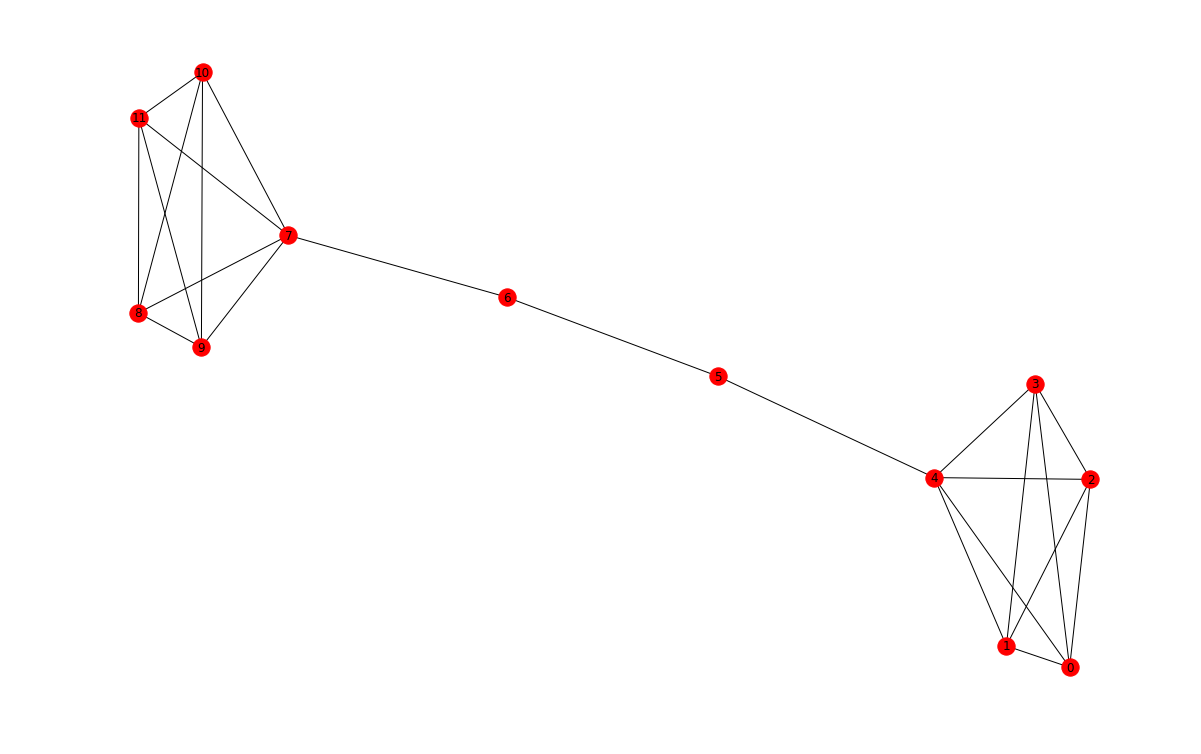

In [21]:
draw_with_labels(g1)

In [22]:
adj = np.zeros([12, 12], dtype=int)
for edge in g1.edges:
    adj[edge[0], edge[1]] = 1
    adj[edge[1], edge[0]] = 1

adj

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]])

In [23]:
nx.adj_matrix(g1).todense()

matrix([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]], dtype=int32)

## 7. Using networkx built-in functions, create the distance matrix for the same graph from the previous problem

In [24]:
dist = np.zeros([12, 12], dtype=int)
sp = nx.all_pairs_shortest_path_length(g1)
for item in sp:
    for key in item[1]:
        dist[item[0], key] = item[1][key]

In [25]:
dist

array([[0, 1, 1, 1, 1, 2, 3, 4, 5, 5, 5, 5],
       [1, 0, 1, 1, 1, 2, 3, 4, 5, 5, 5, 5],
       [1, 1, 0, 1, 1, 2, 3, 4, 5, 5, 5, 5],
       [1, 1, 1, 0, 1, 2, 3, 4, 5, 5, 5, 5],
       [1, 1, 1, 1, 0, 1, 2, 3, 4, 4, 4, 4],
       [2, 2, 2, 2, 1, 0, 1, 2, 3, 3, 3, 3],
       [3, 3, 3, 3, 2, 1, 0, 1, 2, 2, 2, 2],
       [4, 4, 4, 4, 3, 2, 1, 0, 1, 1, 1, 1],
       [5, 5, 5, 5, 4, 3, 2, 1, 0, 1, 1, 1],
       [5, 5, 5, 5, 4, 3, 2, 1, 1, 0, 1, 1],
       [5, 5, 5, 5, 4, 3, 2, 1, 1, 1, 0, 1],
       [5, 5, 5, 5, 4, 3, 2, 1, 1, 1, 1, 0]])

## 8. Identify and remove a cutpoint from this graph and re-draw it

A cutpoint (whatever this means mathematically, I thing nothing though, it should be a cut *set*) could be the edge between 5 and 6:

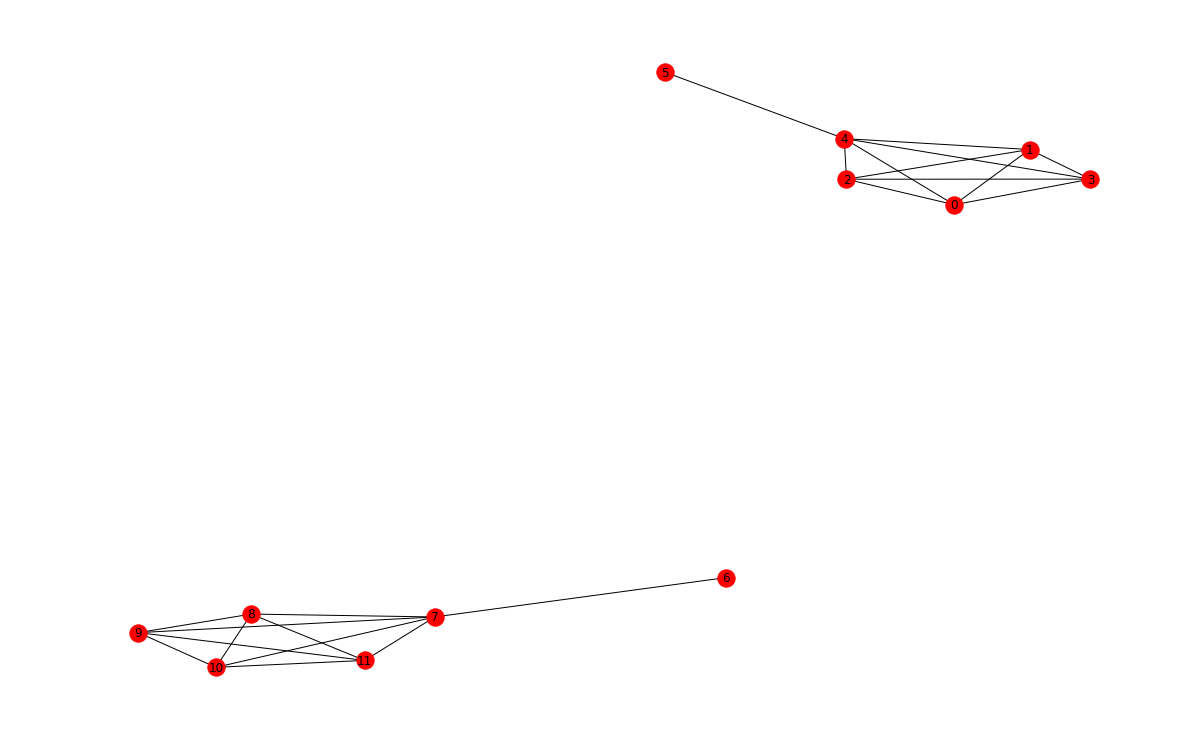

In [26]:
cut = [(5, 6)]
g1.remove_edges_from(cut)
draw_with_labels(g1)

## 9. Use edges_2 to create a graph. List any subgraphs that are maximal cliques

In [27]:
edgelist = nx.read_gpickle('edges_2.pkl')
g2 = nx.Graph()
g2.add_edges_from(edgelist)
g2.nodes

NodeView((0, 1, 2, 3, 4, 6, 7, 8, 9, 5, 10, 11, 12, 13, 14))

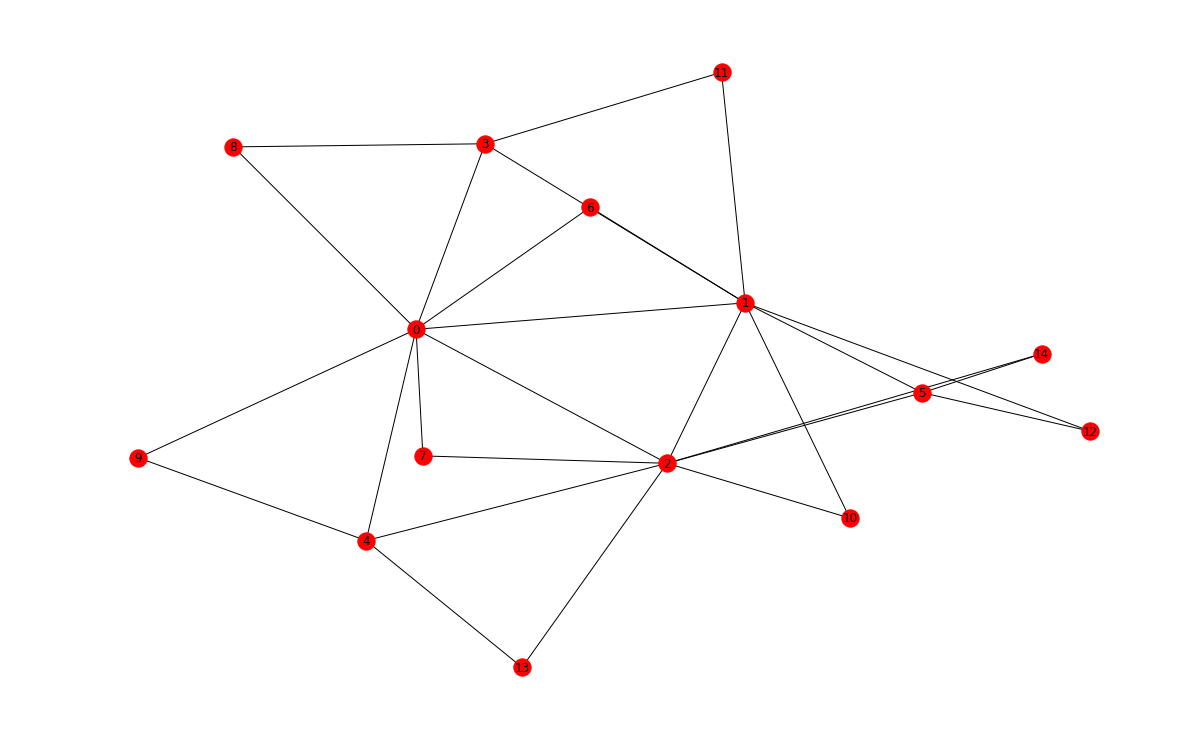

In [28]:
draw_with_labels(g2)

In [29]:
# clique = subgraph such that every two nodes are adjacent (i.e. it is a complete graph if considered by itself)
# maximal clique = a clique which isn't contained in any other clique
for mc in nx.find_cliques(g2):
    print(mc)

[0, 1, 2]
[0, 1, 3]
[0, 1, 6]
[0, 4, 9]
[0, 4, 2]
[0, 7, 2]
[0, 8, 3]
[5, 1, 2]
[5, 1, 12]
[5, 14, 2]
[10, 1, 2]
[11, 1, 3]
[13, 2, 4]


## 10. Determine the Degree, Closeness, and Betweenness measures of centrality for this network

In [30]:
# degree = number of adjacent nodes
g2.degree

DegreeView({0: 8, 1: 8, 2: 8, 3: 4, 4: 4, 6: 2, 7: 2, 8: 2, 9: 2, 5: 4, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2})

In [31]:
# closeness centrality or closeness = reciprocal of the sum of the lengths of the shortest paths between
# the node and all other nodes divided by N-1 - the greater the more central
nx.closeness_centrality(g2)

{0: 0.7,
 1: 0.7,
 2: 0.7,
 3: 0.5384615384615384,
 4: 0.5384615384615384,
 5: 0.5384615384615384,
 6: 0.5,
 7: 0.5,
 8: 0.45161290322580644,
 9: 0.45161290322580644,
 10: 0.5,
 11: 0.45161290322580644,
 12: 0.45161290322580644,
 13: 0.45161290322580644,
 14: 0.45161290322580644}

In [32]:
# betweenness centrality or betweenness = sum of the number of shortest paths from all nodes different from v that
# pass through v divided by the number of shortest paths from all nodes different from v
nx.betweenness_centrality(g2)

{0: 0.315018315018315,
 1: 0.315018315018315,
 2: 0.315018315018315,
 3: 0.047619047619047616,
 4: 0.047619047619047616,
 5: 0.047619047619047616,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0}

## 11. Based on the measures above, which actors have the greatest control over the flow of information? Why do some actors have betweenness measures of zero?

Actors 0, 1 and 2 have the greatest control: they are more and more easily connected to others and, most of all, the betweenness tells us that most of the shortest paths from one person to another go through them.

Some actors have betweenness measures of 0 because no shortest path needs them: this may be because they have a low number of connection that are already connected to others, i.e. they are peripheral nodes of the graph and they don't know someone which isn't known by someone else.

## 12. Create a copy of the last network and do the following:
* remove node 0
* add and edge between 10 and 14 and remove the edge between 1 and 2
* draw the graph
* determine the eccentricity of node 1
* find all cliques containing node 1
* compute the density of the graph
* remove node 1 and compute the density of the resulting graph

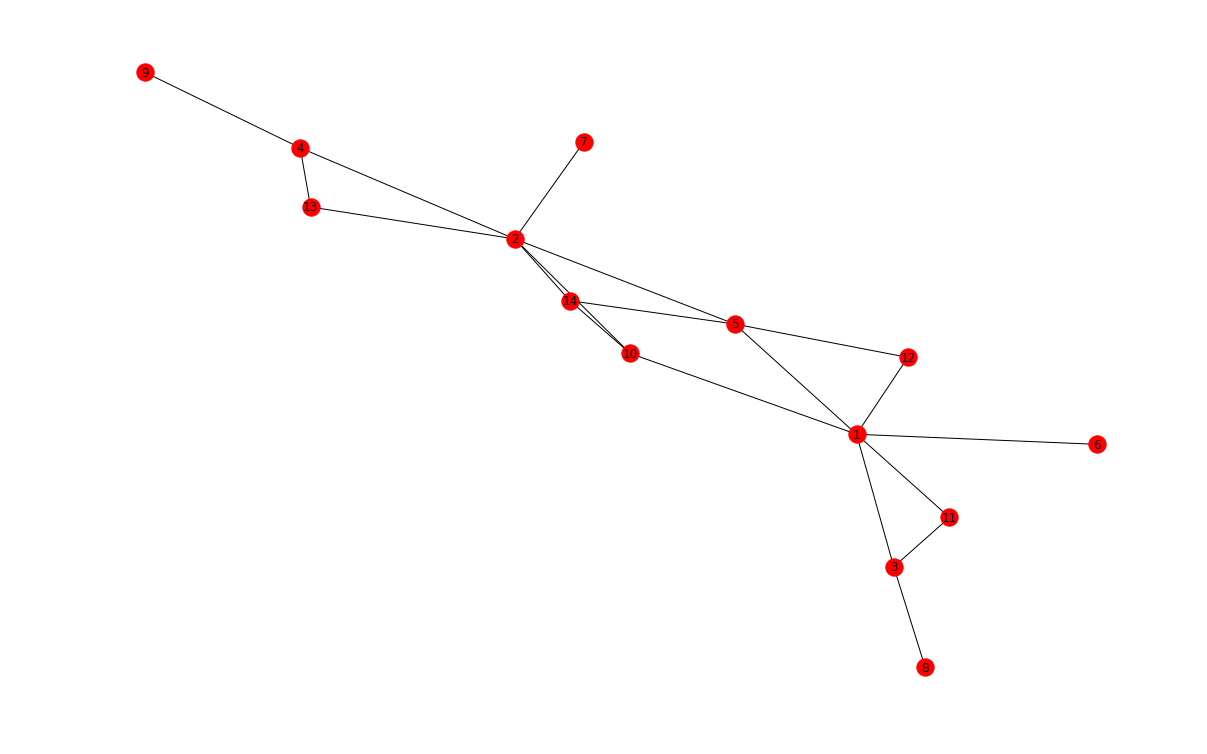

In [33]:
g2_copy = g2.copy()
g2_copy.remove_node(0)
g2_copy.add_edge(10, 14)
g2_copy.remove_edge(1, 2)
draw_with_labels(g2_copy)

In [34]:
# eccentricity = greatest geodesic distance between v and any other node
nx.eccentricity(g2_copy, 1)

4

In [36]:
# for mc in nx.find_cliques(g2_copy):
#     if 1 in mc:
#         print(mc)
nx.cliques_containing_node(g2_copy, 1)

[[1, 3, 11], [1, 5, 12], [1, 6], [1, 10]]

In [37]:
# density = how much the number of edges is close to the maximum possible (complete graph)
nx.density(g2_copy)

0.2087912087912088

In [38]:
g2_copy.remove_node(1)
nx.density(g2_copy)

0.16666666666666666

## 13. Create a directed graph from edges_3.pkl and do the following:
* create the adjacency matrix
* compute the indegree and outdegree centrality for all actors in this network using the adjacency matrix
* compare your results to the in and out_degree_centrality methods

In [244]:
edgelist = nx.read_gpickle('edges_3.pkl')
g3 = nx.DiGraph()
g3.add_edges_from(edgelist)
g3.nodes

NodeView((1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

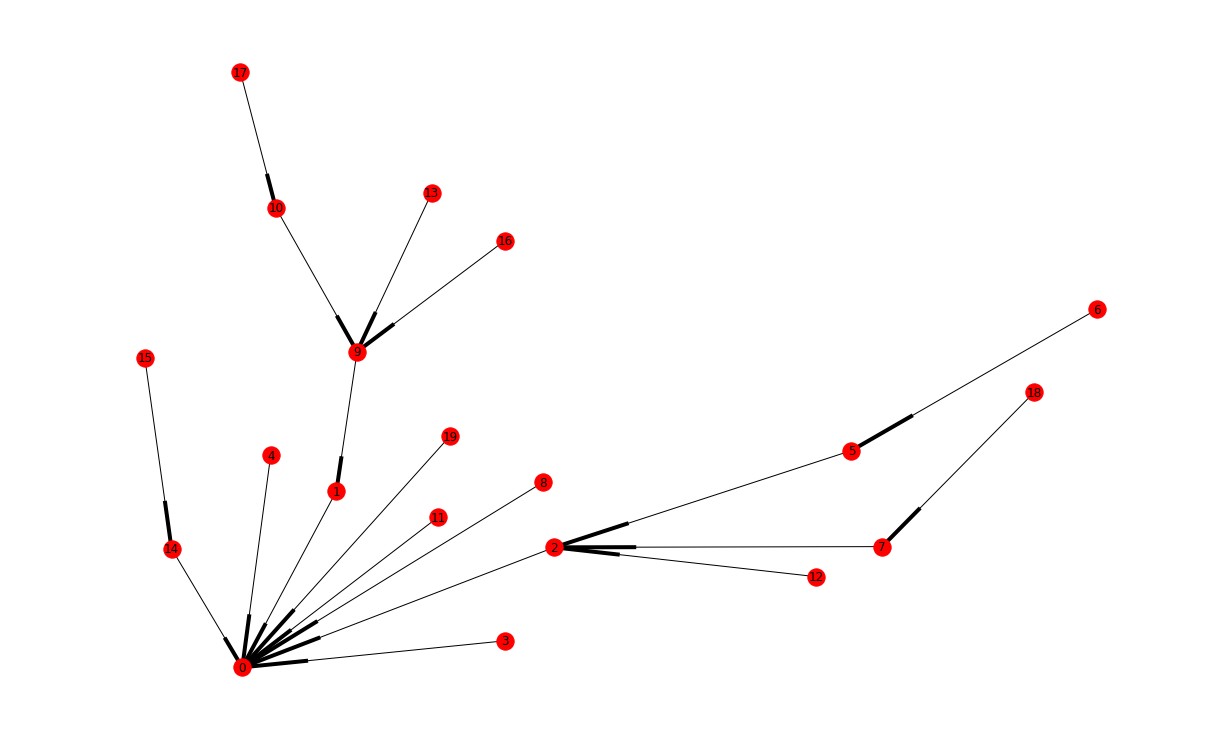

In [229]:
draw_with_labels(g3)

In [247]:
# create the adjacency matrix
adj = nx.adjacency_matrix(g3)
adj = adj.todense()
# node 1 comes before node 0
adj

matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0,

In [270]:
# in-out degree centrality = fraction of number of nodes incoming-outcoming edges are connected to
n_edges = len(g3.edges)
insum = np.sum(adj, axis=0).tolist()[0]
outsum = np.sum(adj, axis=1).reshape(1, -1).tolist()[0]
# remember that node 1 comes before node 0
insum[0], insum[1] = insum[1], insum[0]
outsum[0], outsum[1] = outsum[1], outsum[0]

In [271]:
[d / n_edges for d in insum]

[0.42105263157894735,
 0.05263157894736842,
 0.15789473684210525,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.05263157894736842,
 0.0,
 0.15789473684210525,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [272]:
[d / n_edges for d in outsum]

[0.0,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842]

In [223]:
# compare your results to the in and out_degree_centrality methods
nx.in_degree_centrality(g3)

{0: 0.42105263157894735,
 1: 0.05263157894736842,
 2: 0.15789473684210525,
 3: 0.0,
 4: 0.0,
 5: 0.05263157894736842,
 6: 0.0,
 7: 0.05263157894736842,
 8: 0.0,
 9: 0.15789473684210525,
 10: 0.05263157894736842,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.05263157894736842,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0}

In [224]:
nx.out_degree_centrality(g3)

{0: 0.0,
 1: 0.05263157894736842,
 2: 0.05263157894736842,
 3: 0.05263157894736842,
 4: 0.05263157894736842,
 5: 0.05263157894736842,
 6: 0.05263157894736842,
 7: 0.05263157894736842,
 8: 0.05263157894736842,
 9: 0.05263157894736842,
 10: 0.05263157894736842,
 11: 0.05263157894736842,
 12: 0.05263157894736842,
 13: 0.05263157894736842,
 14: 0.05263157894736842,
 15: 0.05263157894736842,
 16: 0.05263157894736842,
 17: 0.05263157894736842,
 18: 0.05263157894736842,
 19: 0.05263157894736842}